# Decision Tree

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('tennis.csv')
dataset

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


## Membuat data latih & uji

In [3]:
for col in ['day','outlook','temp','humidity','wind','play']:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    dataset
    print(dataset['day'],dataset['outlook'],dataset['temp'],dataset['humidity'],dataset['wind'],dataset['play'])

0      0
1      6
2      7
3      8
4      9
5     10
6     11
7     12
8     13
9      1
10     2
11     3
12     4
13     5
Name: day, dtype: int32 0        Sunny
1        Sunny
2     Overcast
3         Rain
4         Rain
5         Rain
6     Overcast
7        Sunny
8        Sunny
9         Rain
10       Sunny
11    Overcast
12    Overcast
13        Rain
Name: outlook, dtype: object 0      Hot
1      Hot
2      Hot
3     Mild
4     Cool
5     Cool
6     Cool
7     Mild
8     Cool
9     Mild
10    Mild
11    Mild
12     Hot
13    Mild
Name: temp, dtype: object 0       High
1       High
2       High
3       High
4     Normal
5     Normal
6     Normal
7       High
8     Normal
9     Normal
10    Normal
11      High
12    Normal
13      High
Name: humidity, dtype: object 0       Weak
1     Strong
2       Weak
3       Weak
4       Weak
5     Strong
6     Strong
7       Weak
8       Weak
9       Weak
10    Strong
11    Strong
12      Weak
13    Strong
Name: wind, dtype: object 0      No
1

In [4]:
features = dataset.columns[:-1]
target = dataset.columns[-1]

In [5]:
X = dataset[features].values
y = dataset[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
dataset

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [7]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pred = model_tree.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi prediksi: %.2f%%' % (accuracy * 100.0))

Akurasi prediksi: 40.00%


In [10]:
new_predict = [[3, 0, 23, 75, 0]] # outlook = overcast; temp = mild; humidity = normal; windy = False
prediction = model_tree.predict(new_predict)
print('Prediksi untuk kasus baru: %s' % ('Yes' if prediction == 1 else 'No'))

Prediksi untuk kasus baru: No


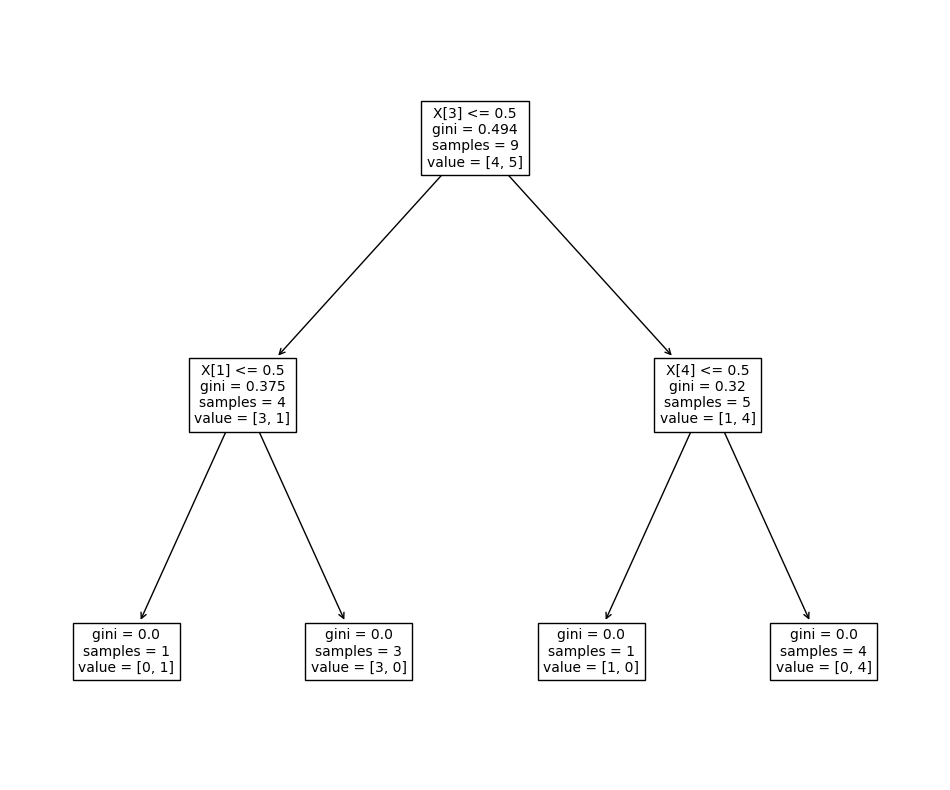

In [11]:
from sklearn.tree import plot_tree
plt.subplots(figsize = (12,10))
plot_tree (model_tree, fontsize = 10)
plt.show()